---
format:
    html:
        code-fold: true
        fig-width: 8
        fig-height: 6
embed-resources: true
toc: true
number-sections: true
execute: 
  warning: false
---

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym


%matplotlib inline

In [3]:
x= sym.Symbol('x')
alpha = sym.Symbol('alpha')
gamma = sym.Symbol('gamma')

frechet_cdf_s = sym.Piecewise(
    (sym.exp(-x**(-alpha)), x>0),
    (0,True))
gumbel_cdf_s = sym.exp(-sym.exp(-x))
weibull_cdf_s = sym.Piecewise(
    (sym.exp(-(-x)**alpha),x<=0),
    (1,x>0))
GEV_cdf_s = sym.Piecewise(
    (sym.exp(-(1 + gamma * x)**(-1/gamma)), (1 + gamma * x) > 0))

GP_cdf_s = sym.Piecewise(
    (1-(1+gamma*x)**(-1/gamma), gamma > 0),
    (1-sym.exp(-x),gamma == 0))




frechet_cdf = sym.lambdify((x,alpha),frechet_cdf_s,'numpy')
gumbel_cdf = sym.lambdify(x,gumbel_cdf_s,'numpy')
weibull_cdf = sym.lambdify((x,alpha),weibull_cdf_s,'numpy')
GEV_cdf = sym.lambdify((x,gamma),GEV_cdf_s,'numpy')
GP_cdf = sym.lambdify((x,gamma),GP_cdf_s,'numpy')

frechet_pdf_s = sym.diff(frechet_cdf_s,x)
frechet_pdf = sym.lambdify((x,alpha),frechet_pdf_s,'numpy')

gumbel_pdf_s = sym.diff(gumbel_cdf_s,x)
gumbel_pdf = sym.lambdify(x,gumbel_pdf_s,'numpy')

weibull_pdf_s = sym.diff(weibull_cdf_s,x)
weibull_pdf = sym.lambdify((x,alpha),weibull_pdf_s,'numpy')

GEV_pdf_s = sym.diff(GEV_cdf_s,x)
GEV_pdf = sym.lambdify((x,gamma),GEV_pdf_s,'numpy')

GP_pdf = sym.lambdify((x,gamma),sym.diff(GP_cdf_s,x),'numpy')



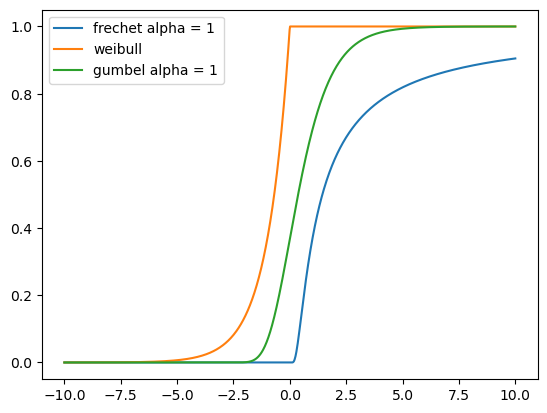

In [3]:
x = np.linspace(-10,10,1000)

plt.figure(1).clear()

plt.plot(x,frechet_cdf(x,1),label="frechet alpha = 1")
plt.plot(x,weibull_cdf(x,1),label="weibull")
plt.plot(x,gumbel_cdf(x),label="gumbel alpha = 1")
plt.legend()
plt.show()

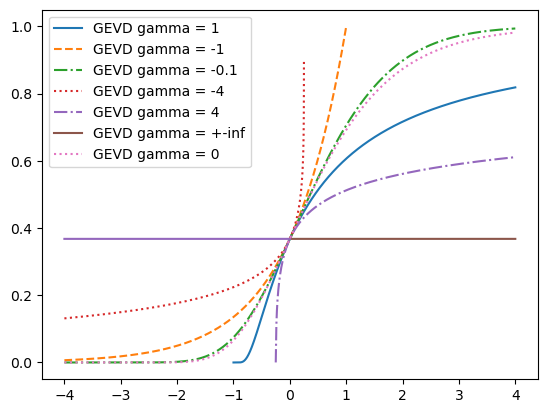

In [7]:
x = np.linspace(-4,4,100000)


plt.figure(2).clear()
plt.plot(x,GEV_cdf(x,1),label="GEVD gamma = 1")
plt.plot(x,GEV_cdf(x,-1),'--',label="GEVD gamma = -1")
plt.plot(x,GEV_cdf(x,-0.1),'-.',label="GEVD gamma = -0.1")
plt.plot(x,GEV_cdf(x,-4),':',label="GEVD gamma = -4")
plt.plot(x,GEV_cdf(x,4),'-.',label="GEVD gamma = 4")
plt.plot(x,GEV_cdf(x,np.infty),label="GEVD gamma = +-inf")
plt.plot(x,GEV_cdf(x,-np.infty),'tab:purple')
plt.plot(x,gumbel_cdf(x),':',label="GEVD gamma = 0")
plt.legend()
plt.show()

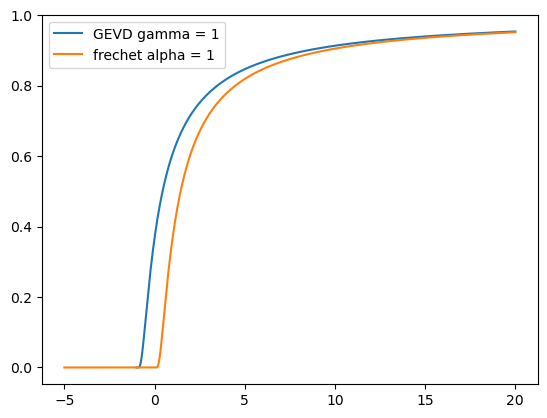

In [5]:
%matplotlib inline
x = np.linspace(-5,20,1000)

plt.figure(3).clear()
plt.plot(x,GEV_cdf(x,1),label="GEVD gamma = 1")
plt.plot(x,frechet_cdf(x,1),label="frechet alpha = 1")
plt.legend()
plt.show()


Text(0.5, 1.0, 'GP gamma <0')

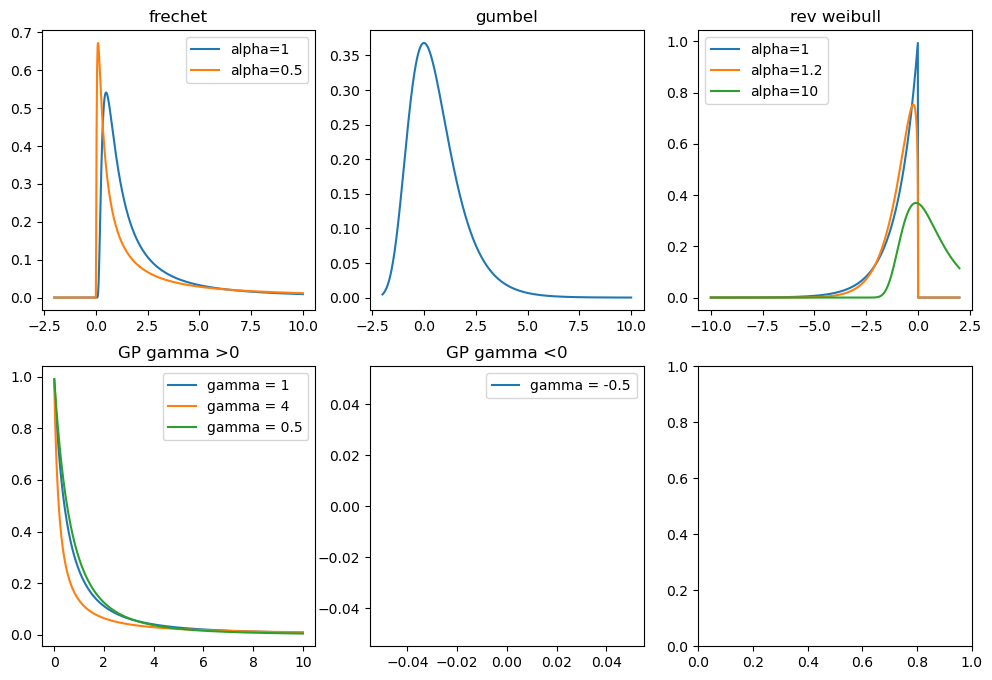

In [14]:
%matplotlib inline
x = np.linspace(-2,10,1000)

fig,axs = plt.subplots(2,3,figsize=(12,8))
axs = axs.flatten()
axs[0].plot(x,frechet_pdf(x,1),label="alpha=1")
axs[0].plot(x,frechet_pdf(x,0.5),label="alpha=0.5")
# axs[0].plot(x,frechet_pdf(x,0.01),label="alpha=0.01")
axs[0].set_title("frechet")
axs[0].legend()
axs[1].plot(x,gumbel_pdf(x))
axs[1].set_title("gumbel")
axs[2].plot(-x,weibull_pdf(-x,1),label="alpha=1")
axs[2].plot(-x,weibull_pdf(-x,1.2),label="alpha=1.2")
# axs[2].plot(-x,GEV_pdf(-x,0.1),label="alpha=10")
axs[2].set_title("rev weibull")
axs[2].legend()
# axs[3].plot(x[x>=0],GP_pdf(x[x>=0],0),label='gamma = 0')
axs[3].plot(x[x>=0],GP_pdf(x[x>=0],1),label='gamma = 1')
axs[3].plot(x[x>=0],GP_pdf(x[x>=0],4),label='gamma = 4')
axs[3].plot(x[x>=0],GP_pdf(x[x>=0],0.5),label='gamma = 0.5')
axs[3].legend()
axs[3].set_title("GP gamma >0")

# axs[4].plot(x[(x>=0)* (x<1)],GP_cdf(x[(x>=0)* (x<1)],-1),label='gamma = -1')
axs[4].plot(x[(x>=0)* (x<2)],GP_pdf(x[(x>=0)* (x<2)],-0.5),label='gamma = -0.5')
axs[4].legend()
# axs[4].set_ylim(0,1.5)
axs[4].set_title("GP gamma <0")

It seems that the weight of the tail is maximum for a certain value of gamma.

RuntimeError: Failed to converge after 1000 iterations, value is 1.0905080545783295e+123.

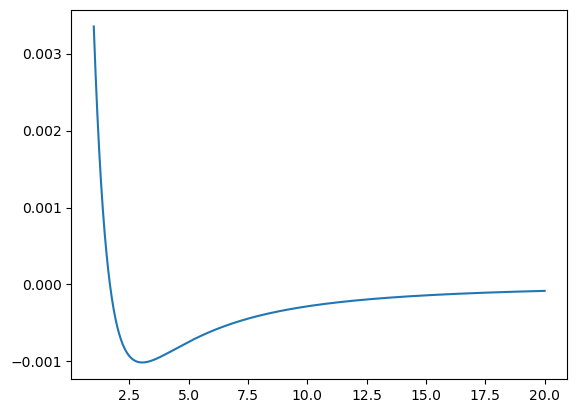

In [10]:
%matplotlib inline
x= sym.Symbol('x')
gamma = sym.Symbol('gamma')
test = sym.diff(GEV_pdf_s,gamma)
test = sym.lambdify((x,gamma),test,'numpy')


xmax = 10
gamma = np.linspace(1,20,1000)
fig, ax = plt.subplots()
ax.clear()
plt.plot(gamma,test(xmax,gamma))

import scipy as sp 

g0 = sp.optimize.newton(lambda g:test(xmax,g),5,tol=1e-3,maxiter=1000)
print(g0)
plt.scatter(g0,test(xmax,g0))

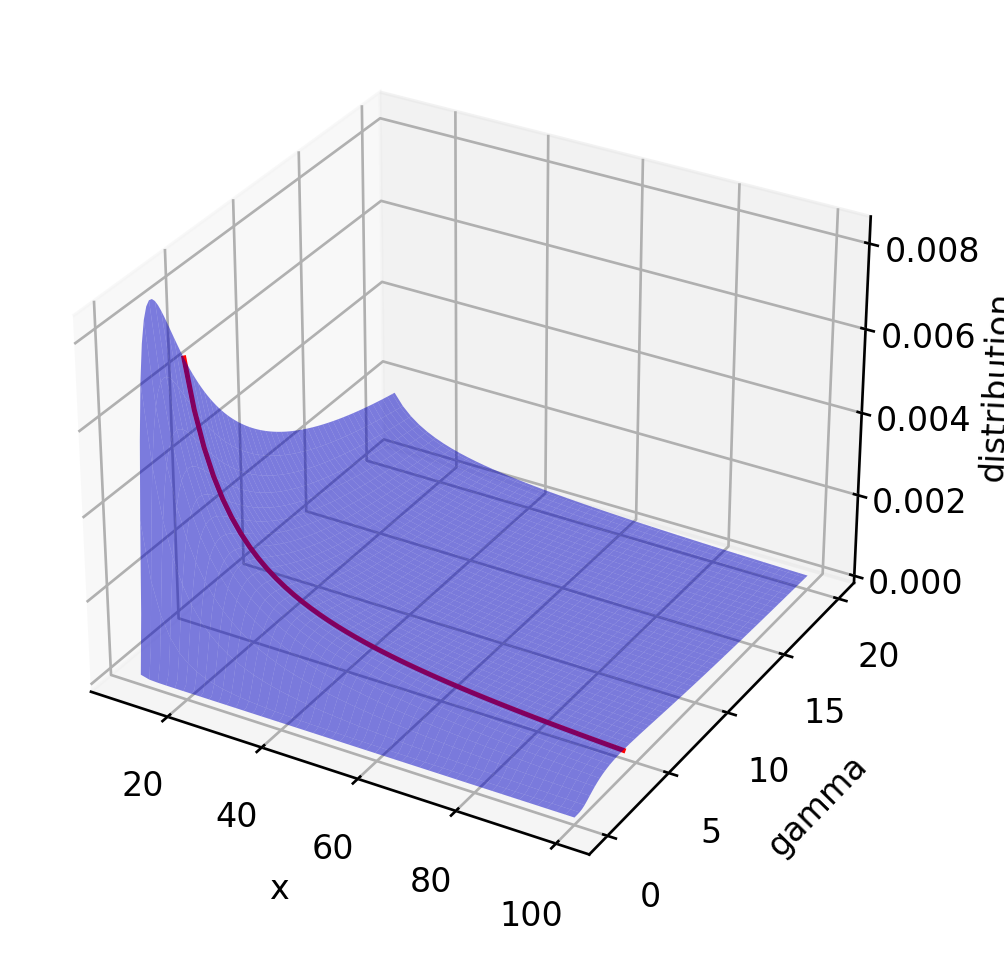

In [48]:
%matplotlib widget
x = np.linspace(10,xmax)
gamma = np.linspace(0.01,20,100)
dist= []
for g in gamma:
    dist.append(GEV_pdf(x,g))

fig = plt.figure(2)
fig.clear()
ax = plt.axes(projection='3d',)
ax.clear()
X,Y = np.meshgrid(x,gamma)

ax.plot_surface(X,Y,np.array(dist), color='blue',alpha=0.5)
ax.plot(x,np.full_like(x,g0),GEV_pdf(x,g0),'r')
ax.set_xlabel('x')
ax.set_ylabel('gamma')
ax.set_zlabel('distribution')
# ax.set_xscale('log')
plt.show()
# fig.clear()

[1.6813065799942486, 1.8561420297288296, 2.003800878457296, 2.1314587271901226, 2.243798169675995, 2.3440402612930034, 2.4344934583254245, 2.516867398295004, 2.592462778564603, 2.662291567426674, 2.7271562092735127, 2.7877034796423494, 2.8444621487760067, 2.8978838376722966, 2.9483153342302404, 2.9960747975717146, 3.0414266497366427, 3.0845981732150713, 3.1257861294054075, 3.165161969156996, 3.2028759795477506, 3.239060616855479, 3.2738332098194696, 3.307298170524554, 3.3395488165647538, 3.370668883578132, 3.400733789108698, 3.4298116952130453, 3.457964407018687, 3.4852481366659047, 3.5117141560910285, 3.5374093574805534, 3.5623767366111156, 3.5866558114469327, 3.61028298611375, 3.633291868572321, 3.6557135488731736, 3.6775768437113894, 3.6989085120561644, 3.7197334458596902, 3.7400852884894893, 3.7599656073982457, 3.77940428056048, 3.798420245804843, 3.8170312553433634, 3.8352539723968277, 3.8531040581940097, 3.870596250471363, 3.887744434449051, 3.904561707131047]


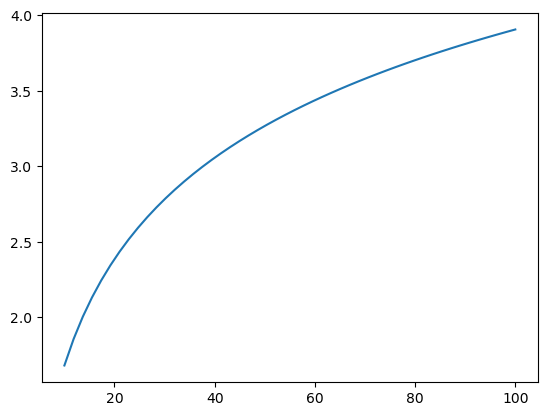

In [17]:
import scipy as sp 

xspan = np.linspace(10,100)

g0 = []
for x in xspan:
    g0.append(sp.optimize.newton(lambda g:test(x,g),2+xspan/100,tol=1e-3,maxiter=1000)[0])

plt.plot(xspan,g0)
# plt.plot(xspan,np.log(xspan))
print(g0)
pass

### Méthode des Block Maxima : Approche Mathématique

La méthode des block maxima repose sur l'idée de modéliser les maxima d'échantillons ou de blocs d'une série temporelle par une distribution spécifique appelée la distribution Generalized Extreme Value (GEV). Voici les étapes mathématiques détaillées de cette méthode :

#### 1. Division en Blocs

Supposons que nous ayons une série temporelle de données $ \{X_t\}_{t=1}^n $. On divise cette série en $ k $ blocs de taille $ m $ tels que $ n = k \times m $. Les blocs sont :

$$ B_1 = \{X_1, X_2, \ldots, X_m\} $$
$$ B_2 = \{X_{m+1}, X_{m+2}, \ldots, X_{2m}\} $$
$$ \vdots $$
$$ B_k = \{X_{(k-1)m+1}, \ldots, X_{km}\} $$

#### 2. Sélection des Maxima

Pour chaque bloc $ B_i $, on détermine le maximum :

$$ M_i = \max(B_i) = \max(X_{(i-1)m+1}, X_{(i-1)m+2}, \ldots, X_{im}) $$

Ainsi, on obtient une nouvelle série $ \{M_i\}_{i=1}^k $ qui contient les maxima de chaque bloc.

#### 3. Distribution des Maxima

Selon la théorie des valeurs extrêmes, pour de grands blocs (grande taille $ m $), la distribution des maxima $ \{M_i\} $ suit une des trois formes possibles de la distribution de valeurs extrêmes généralisée (GEV).

La fonction de répartition cumulative (FRC) de la distribution GEV est :

$$ G(z; \mu, \sigma, \xi) = \exp \left( - \left[ 1 + \xi \left( \frac{z - \mu}{\sigma} \right) \right]^{-1/\xi} \right) $$

sous la condition que $ 1 + \xi \left( \frac{z - \mu}{\sigma} \right) > 0 $, où :
- $ \mu $ est le paramètre de localisation.
- $ \sigma > 0 $ est le paramètre d'échelle.
- $ \xi $ est le paramètre de forme.

#### 4. Estimation des Paramètres

Les paramètres $ \mu $, $ \sigma $ et $ \xi $ peuvent être estimés à partir des données de maxima $ \{M_i\} $ en utilisant des méthodes statistiques telles que :

- **Méthode du Maximum de Vraisemblance** (MLE) : Consiste à maximiser la fonction de vraisemblance de la distribution GEV.
- **Méthode des Moments** : Consiste à égaliser les moments théoriques de la distribution GEV avec les moments empiriques des données de maxima.

La fonction de vraisemblance pour les $ k $ maxima est :

$$ L(\mu, \sigma, \xi) = \prod_{i=1}^k g(M_i; \mu, \sigma, \xi) $$

où $ g(z; \mu, \sigma, \xi) $ est la densité de probabilité associée à la distribution GEV, donnée par :

$$ g(z; \mu, \sigma, \xi) = \frac{1}{\sigma} \left( 1 + \xi \left( \frac{z - \mu}{\sigma} \right) \right)^{-(1/\xi + 1)} \exp \left( - \left[ 1 + \xi \left( \frac{z - \mu}{\sigma} \right) \right]^{-1/\xi} \right) $$

#### 5. Validation du Modèle

Une fois les paramètres estimés, il est crucial de vérifier que le modèle GEV ajuste bien les données. Pour cela, on peut utiliser :

- **Tests de bonté d'ajustement** : Par exemple, le test de Kolmogorov-Smirnov ou des tests de chi-carré.
- **Graphiques de diagnostic** : Comme les Q-Q plots (quantile-quantile plots) où les quantiles empiriques sont comparés aux quantiles théoriques de la distribution GEV.

#### 6. Utilisation du Modèle

Une fois le modèle validé, il peut être utilisé pour :
- **Estimer des quantiles extrêmes** : Par exemple, le niveau d'un événement centennal (un événement qui se produit en moyenne une fois tous les 100 ans).
- **Calculer des probabilités d'événements extrêmes** : Par exemple, la probabilité qu'un maximum dépasse un certain seuil.

### Exemple Numérique

Considérons une série de données mensuelles sur 10 ans (120 mois), nous divisons ces données en blocs annuels (12 mois par bloc), et nous obtenons les maxima de chaque année. Supposons que ces maxima annuels sont :

$$ \{M_i\} = \{20.1, 22.3, 21.5, 23.0, 24.7, 22.9, 23.8, 25.2, 24.3, 26.1\} $$

Nous estimons les paramètres $ \mu $, $ \sigma $ et $ \xi $ à partir de ces 10 valeurs et utilisons la distribution GEV pour estimer, par exemple, le maximum annuel avec une période de retour de 50 ans.

### Conclusion

La méthode des block maxima est une technique puissante pour analyser et modéliser les valeurs extrêmes. Elle repose sur des fondements théoriques solides et permet d'estimer la probabilité de survenue d'événements extrêmes, ce qui est crucial dans de nombreux domaines tels que la gestion des risques, l'hydrologie, et la finance.

Le théorème univarié dans le contexte de l'analyse de valeurs extrêmes traite de la convergence de la distribution des maxima de blocs d'une série temporelle vers une distribution limite. Ce théorème permet de comprendre comment les maxima de blocs de différentes tailles se comportent lorsque la taille des blocs change.

### Théorème des valeurs extrêmes (Univarié)

Le théorème univarié des valeurs extrêmes stipule que, sous certaines conditions, la distribution des maxima de blocs de taille $ n $ converge vers une distribution de valeurs extrêmes lorsqu'on laisse $ n $ tendre vers l'infini.

Soit $ \{X_i\} $ une suite de variables aléatoires indépendantes et identiquement distribuées (i.i.d) avec fonction de répartition $ F $. On s'intéresse aux maxima $ M_n = \max(X_1, X_2, \ldots, X_n) $.

Le théorème des valeurs extrêmes dit que, s'il existe des séquences de normalisation $ \{a_n > 0\} $ et $ \{b_n\} $ telles que pour tout $ x $,

$$ \lim_{n \to \infty} P\left( \frac{M_n - b_n}{a_n} \leq x \right) = G(x) $$

alors $ G(x) $ est une distribution de valeurs extrêmes généralisée (GEV) de la forme :

$$ G(x) = \exp \left( - \left( 1 + \xi \left( \frac{x - \mu}{\sigma} \right) \right)^{-1/\xi} \right) $$

où $ \mu $, $ \sigma > 0 $, et $ \xi $ sont les paramètres de localisation, d'échelle et de forme, respectivement.

### Changement de Taille de Bloc

Le passage d'une taille de bloc à une autre peut se faire en utilisant la propriété de stabilité de la distribution GEV. Supposons que nous avons déjà une distribution GEV ajustée pour des blocs de taille $ n $ et nous souhaitons ajuster une distribution pour des blocs de taille $ m $.

#### 1. Théorème de Renouvellement

Si $ M_n $ suit une distribution GEV avec paramètres $ (\mu_n, \sigma_n, \xi) $, alors pour des blocs de taille $ m $, les paramètres peuvent être transformés pour s'adapter à la nouvelle taille de bloc. Soit $ M_m $ les maxima pour des blocs de taille $ m $. Les nouveaux paramètres $ (\mu_m, \sigma_m, \xi) $ sont liés aux anciens par des relations de rééchelonnement.

#### 2. Relation de Rééchelonnement

Les paramètres de la distribution pour une nouvelle taille de bloc peuvent être trouvés comme suit :

- Si la taille de bloc passe de $ n $ à $ m $, où $ m = kn $ pour un certain entier $ k $, alors les paramètres $ (\mu_m, \sigma_m, \xi) $ peuvent être trouvés par la relation :

$$ \mu_m = \mu_n + \sigma_n \left( \frac{(m/n)^{\xi} - 1}{\xi} \right) $$
$$ \sigma_m = \sigma_n \left( m/n \right)^{\xi} $$
$$ \xi \text{ reste inchangé} $$

### Exemple de Changement de Taille de Bloc

Supposons que nous avons des maxima $ M_n $ de blocs de taille $ n $ suivant une distribution GEV avec des paramètres estimés $ \mu_n = 10 $, $ \sigma_n = 2 $, et $ \xi = 0.1 $. Si nous voulons ajuster une distribution GEV pour des blocs de taille $ m = 2n $, les nouveaux paramètres seront :

$$ \mu_{2n} = 10 + 2 \left( \frac{(2)^{0.1} - 1}{0.1} \right) $$
$$ \sigma_{2n} = 2 \left( 2 \right)^{0.1} $$

Calculons les valeurs :

$$ \mu_{2n} = 10 + 2 \left( \frac{1.0718 - 1}{0.1} \right) \approx 10 + 2 \times 0.718 \approx 11.436 $$
$$ \sigma_{2n} = 2 \times 1.0718 \approx 2.1436 $$

Ainsi, les nouveaux paramètres pour les blocs de taille $ 2n $ seraient approximativement $ \mu_{2n} \approx 11.436 $, $ \sigma_{2n} \approx 2.1436 $, et $ \xi = 0.1 $.

### Conclusion

Le théorème univarié des valeurs extrêmes et les relations de rééchelonnement des paramètres permettent de comprendre comment les maxima de blocs de différentes tailles se comportent et comment adapter la distribution GEV lorsque la taille des blocs change. Ces concepts sont essentiels pour l'analyse et la modélisation des valeurs extrêmes dans diverses applications telles que la gestion des risques, la météorologie et la finance.

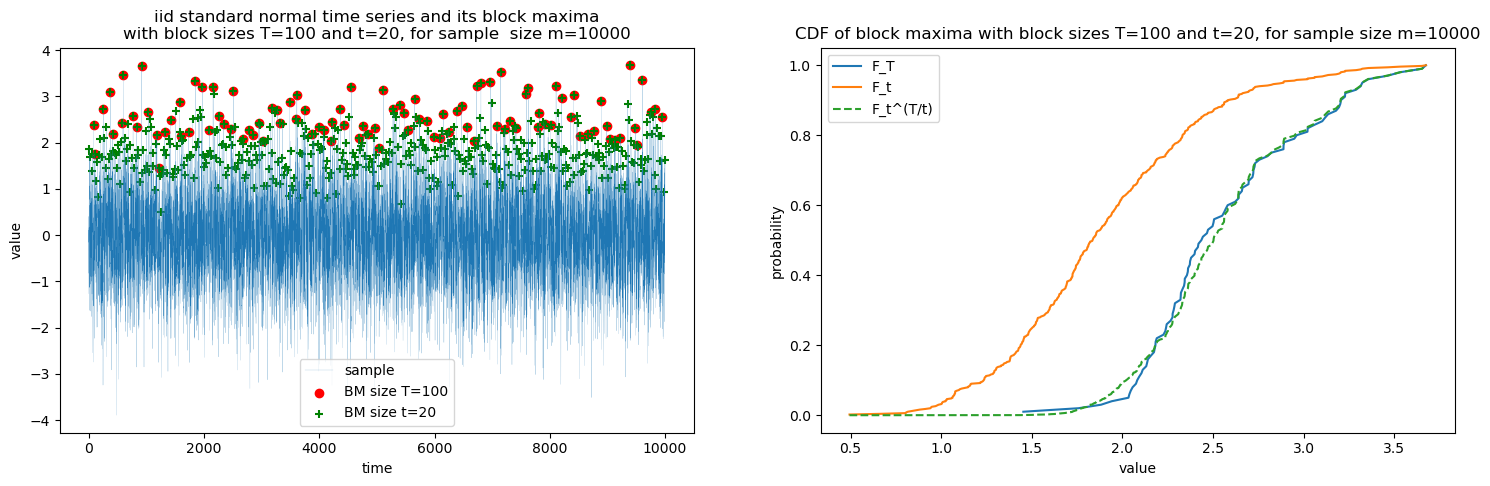

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

m = 10000
X = np.random.standard_normal(m)
T = 100
t = 20
XT = np.array([np.max(X[i*T:(i+1)*T]) for i in range(m//T)])
iXT = np.array([i*T+np.argmax(X[i*T:(i+1)*T]) for i in range(m//T)])
Xt = np.array([np.max(X[i*t:(i+1)*t]) for i in range(m//t)])
iXt = np.array([i*t+np.argmax(X[i*t:(i+1)*t]) for i in range(m//t)])
plt.figure(figsize=(18,5))
plt.subplot(121)
plt.plot(X,linewidth=0.1, label='sample')
plt.scatter(iXT,XT,c='r', label=f'BM size T={T}')
plt.scatter(iXt,Xt,c='g',marker='+', label=f'BM size t={t}')
plt.legend(loc='lower center')
plt.xlabel('time')
plt.ylabel('value')
plt.title(f'iid standard normal time series and its block maxima\nwith block sizes T={T} and t={t}, for sample  size m={m}')
plt.subplot(122)
plt.plot(np.sort(XT),np.linspace(1/len(XT),1,len(XT)),c='r',label='F_T')
plt.plot(np.sort(Xt),np.linspace(1/len(Xt),1,len(Xt)),c='g',label='F_t')
plt.plot(np.sort(Xt),np.linspace(1/len(Xt),1,len(Xt))**(T/t),'--',label='F_t^(T/t)')
plt.xlabel('value')
plt.ylabel('probability')
plt.title(f'CDF of block maxima with block sizes T={T} and t={t}, for sample size m={m}')
plt.legend()

Les courbes sont bien supperposées

In [ ]:
pd.rea